In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
df = pd.read_csv('dataset/customer_sales.csv')
df.head(2)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
0,BN-2011-7407039,1/1/11,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,$45,-26.0,3.0
1,AZ-2011-9050313,1/3/11,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,$854,290.0,7.0


# Step 1: Understand the dataset 

Are there any missing values in the dataset?

In [208]:
na_df = pd.DataFrame(df.isna().sum()/len(df)*100, columns=['% of Missing Values'])
na_df.sort_values('% of Missing Values', ascending = False)

,% of Missing Values
Profit,0.161551
Quantity,0.161551
Discount,0.086989
Order Date,0.074562
Ship Mode,0.062135
Category,0.062135
State,0.049708
City,0.049708
Sales,0.024854
Customer Name,0.012427


2. What is the range of dates in the dataset

In [209]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
print('range of dates:', df['Order Date'].max() - df['Order Date'].min())

range of dates: 1460 days 00:00:00


How many unique customers are there in the dataset?
How many unique order are there in the dataset?

In [210]:
print('number of unique customer is:', df[['Customer Name']].nunique().values[0])
print('number of unique orders is:', df[['Order ID']].nunique().values[0])

number of unique customer is: 792
number of unique orders is: 4117


In [211]:
df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',','').astype(float)
df[['Sales']].describe()

/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/2538418603.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sales'] = df['Sales'].str.replace('$', '').str.replace(',','').astype(float)


,Sales
count,8045.000000
mean,342.542946
std,3218.073605
min,-110.000000
25%,48.000000
50%,116.000000
75%,313.000000
max,206000.000000


Do the transaction amounts (sales) in general increase over time?

/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/241181634.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sale_groupby_date = df.groupby('Order Date').sum().reset_index()


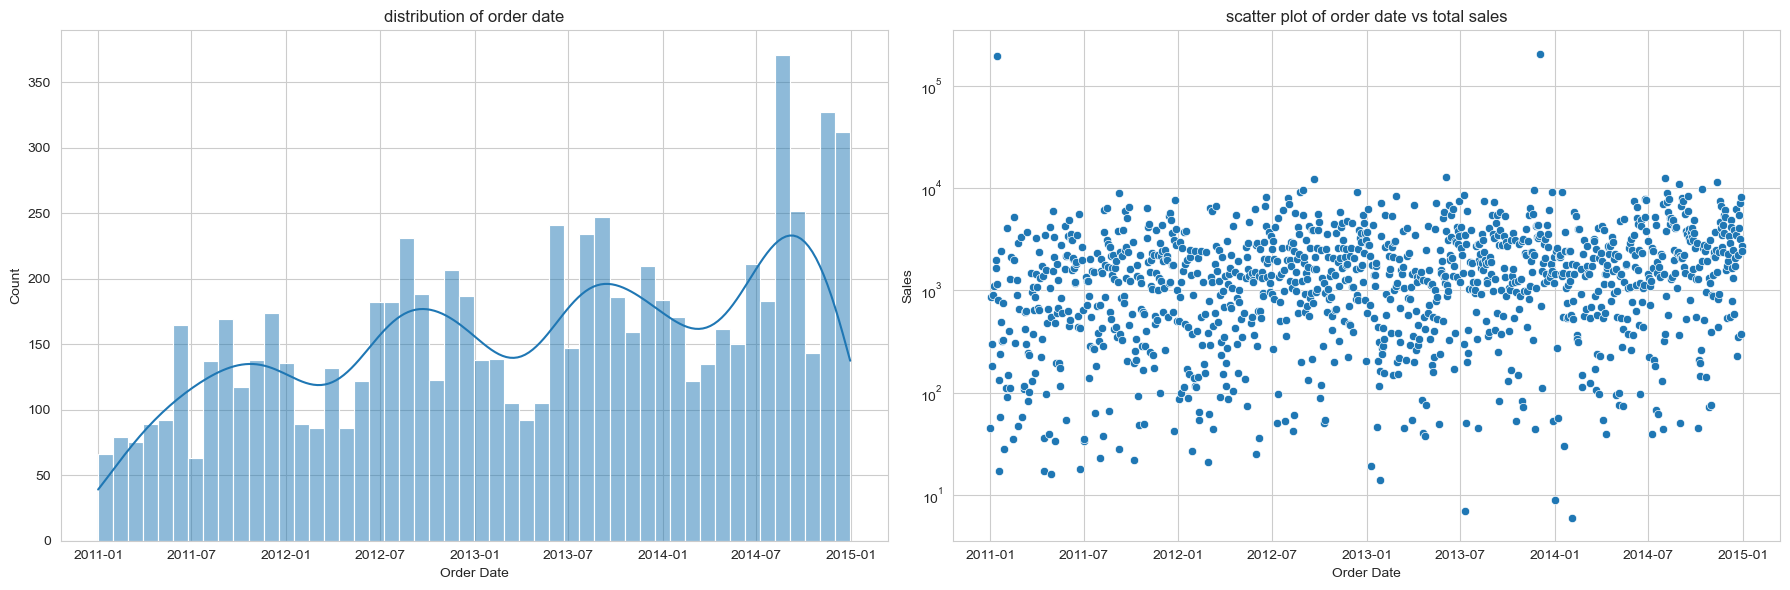

In [212]:
sale_groupby_date = df.groupby('Order Date').sum().reset_index()
fig, ax = plt.subplots(1,2,figsize = (18,6))
sns.set_style('whitegrid')
sns.histplot(x=df['Order Date'], bins=50, kde=True, ax=ax[0])
sns.scatterplot(x=sale_groupby_date['Order Date'], y=sale_groupby_date['Sales'], ax=ax[1])
ax[0].set_title('distribution of order date')
ax[1].set_title('scatter plot of order date vs total sales')
ax[1].set_yscale('log')
plt.tight_layout()

we could see that there is a slight positive correlation between total Sales and order date but the majority of data doesn't show positive correlation, indicating there might be a weak but positive correlation coefficient.

# Step 2: Explore the dataset 

Check outliers and Distribution of Numberical Columns using boxplot

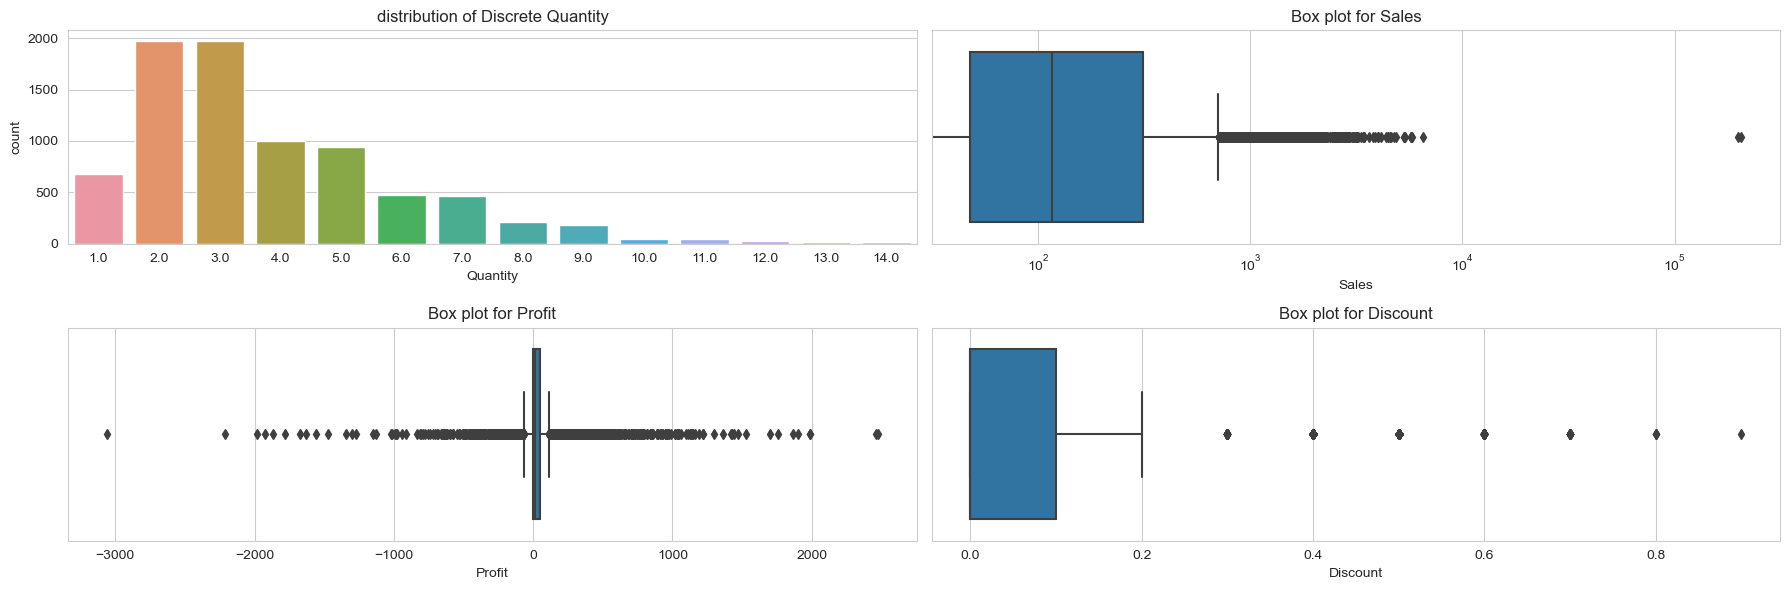

In [213]:
fig, ax = plt.subplots(2,2,figsize=(18,6))
sns.countplot(x='Quantity', data=df, ax=ax[0,0])
plt.tight_layout()
sns.boxplot(x=df['Sales'], ax=ax[0,1])
ax[0,1].set_xscale('log')
sns.boxplot(x=df['Profit'],ax=ax[1,0])
sns.boxplot(x=df['Discount'],ax=ax[1,1])
ax[0,0].set_title('distribution of Discrete Quantity')
ax[0,1].set_title('Box plot for Sales')
ax[1,0].set_title('Box plot for Profit')
ax[1,1].set_title('Box plot for Discount')
fig.tight_layout()

we could see that for Sales the outlier seems like data points larger than 10^5 since it is so far away from the cluster and for Profit the possible outlier should be data points larger than 2000 and less than -3000 and for discount there should not be outlier since the data is pretty spreaded naturally.

In [214]:
df['Sales'] = df['Sales'].apply(lambda x: np.mean(df['Sales']) if x > 10**5 else x)
df['Profit'] = df['Profit'].apply(lambda x: np.mean(df['Sales']) if (x>2000) or (x<-3000) else x)

I replace the outlier with the mean of the data, which shouldn't matter much since the number of outlier is too little to affect the overall data

# Step 2.5: Finding the Best Region-category combo

what are the top and bottom three cities, and states for sales and profits, overall, and for each year?

In [215]:
def compute_metric(ind, dep):
    grouped = df[[ind, dep]].groupby(ind).mean().sort_values(dep, ascending = False).reset_index()
    top_three, bottom_three = grouped.iloc[:3,0].values, grouped.iloc[-3:, 0].values
    print('top three', dep ,ind, 'is', top_three)
    print('bottome three', dep ,ind, 'is', bottom_three)

In [216]:
# Overall
for ind in ['State', 'City']:
    for dep in ['Sales', 'Profit']:
        compute_metric(ind, dep)

top three Sales State is ['Vest-Agder' 'Hordaland' 'Lucerne']
bottome three Sales State is ['Melilla' 'St. Gallen' 'Central Jutland']
top three Profit State is ['Vest-Agder' 'Lucerne' 'Carinthia']
bottome three Profit State is ['Coimbra' 'Braga' 'Aveiro']
top three Sales City is ['Saint-Louis' 'Poitiers' 'Plaisir']
bottome three Sales City is ['Aix-les-Bains' 'Osny' 'Carpentras']
top three Profit City is ['Crawley' 'Poitiers' 'Barletta']
bottome three Profit City is ['Varese' 'Hardenberg' 'Bergen op Zoom']


In [217]:
# For each year 
df['Order Year'] = df['Order Date'].dt.year
Yearly_State = pd.DataFrame(df.groupby(['Order Year', 'State']).sum()).reset_index()
top_sales_state_2011 = Yearly_State[Yearly_State['Order Year'] == 2011].sort_values('Sales', ascending = False).head(3)['State'].values
bottom_sales_state_2011 = Yearly_State[Yearly_State['Order Year'] == 2011].sort_values('Sales', ascending = False).tail(3)['State'].values

def yearly_compute(year, ind, dep):
    Yearly = pd.DataFrame(df.groupby(['Order Year', ind]).mean()).reset_index()
    top = Yearly[Yearly['Order Year'] == year].sort_values(dep, ascending = False).head(3)[ind].values
    bot = Yearly[Yearly['Order Year'] == year].sort_values(dep, ascending = False).tail(3)[ind].values
    print('Top Three', dep, ind, f'of {year} is:', top)
    print('Bottom Three', dep, ind, f'of {year} is:', bot)

for year in np.arange(2011,2015):
    for ind in ['State', 'City']:
        for dep in ['Profit', 'Sales']:
            yearly_compute(year, ind, dep)

Top Three Profit State of 2011 is: ['Limburg' 'Navarra' 'Finland Proper']
Bottom Three Profit State of 2011 is: ['Groningen' 'Overijssel' 'Asturias']
Top Three Sales State of 2011 is: ['Galicia' 'Bremen' 'Limburg']
Bottom Three Sales State of 2011 is: ['Calabria' 'Utrecht' 'Basque Country']
Top Three Profit City of 2011 is: ['Blackpool' 'Genk' 'Slough']
Bottom Three Profit City of 2011 is: ['Hardenberg' 'Arnhem' 'Ercolano']
Top Three Sales City of 2011 is: ['Lugo' 'Blackpool' 'Nice']
Bottom Three Sales City of 2011 is: ['Quimper' 'Reus' 'Chester']
Top Three Profit State of 2012 is: ['Tyrol' 'Castile-La Mancha' 'Thuringia']
Bottom Three Profit State of 2012 is: ['Groningen' 'North Brabant' 'Aveiro']
Top Three Sales State of 2012 is: ['Cantabria' 'Castile-La Mancha' 'Liguria']
Bottom Three Sales State of 2012 is: ['Upper Austria' 'Gelderland' 'Central Jutland']
Top Three Profit City of 2012 is: ['Cambridge' 'Valenciennes' 'Barletta']
Bottom Three Profit City of 2012 is: ['Haninge' 'Eindh

/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/129015768.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly_State = pd.DataFrame(df.groupby(['Order Year', 'State']).sum()).reset_index()
/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/129015768.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Yearly = pd.DataFrame(df.groupby(['Order Year', ind]).mean()).reset_index()
/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/129015768.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_o

Does discounts increase or decrease the sales

/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/2876818368.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  discount_group = df.groupby('Discount').mean().reset_index()


Text(0.5, 1.0, 'average sales grouped by different discount level')

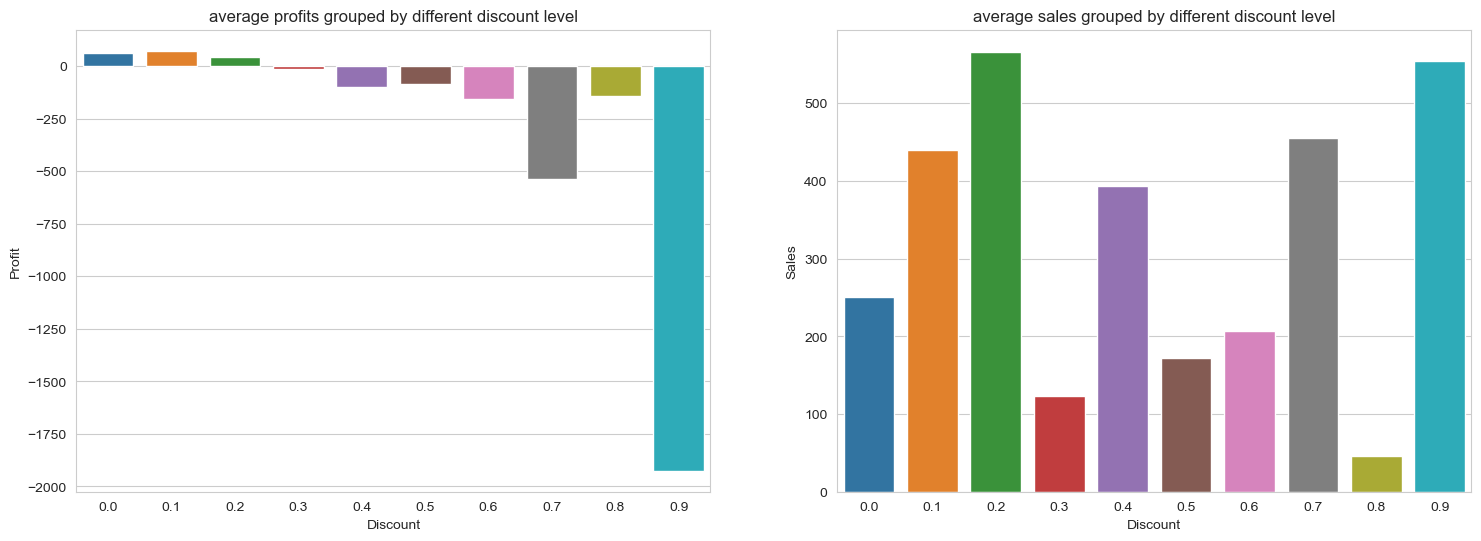

In [218]:
discount_group = df.groupby('Discount').mean().reset_index()
fig, ax = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x=discount_group['Discount'], y=discount_group['Profit'],ax=ax[0])
sns.barplot(x=discount_group['Discount'], y=discount_group['Sales'],ax=ax[1])
ax[0].set_title('average profits grouped by different discount level')
ax[1].set_title('average sales grouped by different discount level')


as shown in the average result of profits and sales grouped by different discount level, the optimal discount to maximize profits is 0.1 and at 0.8 discount level the averaged sales is the lowest.

In [219]:
discount_year_group = df.groupby(['Discount', 'Order Year']).mean().reset_index()
idx = discount_year_group.groupby('Order Year')['Profit'].idxmax()
result = discount_year_group.loc[idx]
result

/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/3731740768.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  discount_year_group = df.groupby(['Discount', 'Order Year']).mean().reset_index()


,Discount,Order Year,Sales,Profit,Quantity
4,0.1,2011.0,448.047431,81.842520,3.728346
5,0.1,2012.0,415.412104,74.703170,3.682997
6,0.1,2013.0,469.709150,74.908497,3.826797
3,0.0,2014.0,255.699937,64.561592,3.790903


We could see that the optimal discount level changes as years goes by, it was 0.1 for 2011 to 2013 but 0 for 2014

How do the different categories and sub-categories perfrom over time by region?

/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/1277206733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north['Category_SubCategory'] = df_north['Category'] + '_' + df_north['Sub-Category']


Text(0.5, 1.0, 'North Region Category-Sub Category Combo Performance Along Seasonal Time')

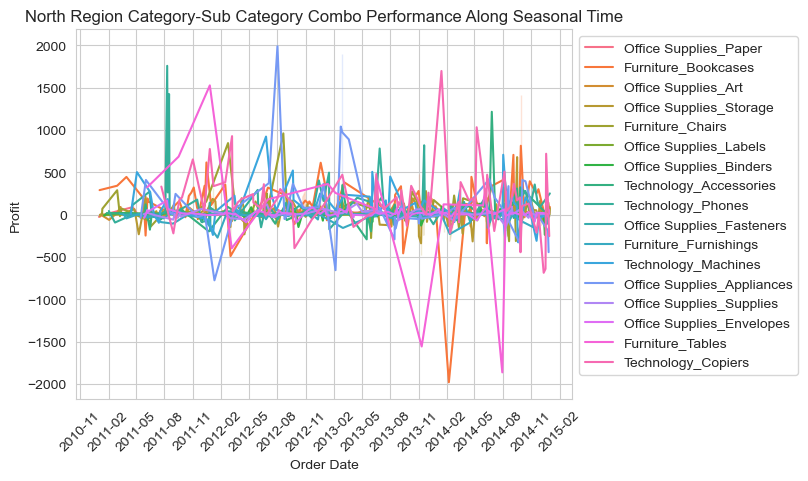

In [220]:
from matplotlib.dates import MonthLocator, DateFormatter

df_north = df[df['Region']=='North']
df_north['Category_SubCategory'] = df_north['Category'] + '_' + df_north['Sub-Category']

sns.lineplot(x=df_north['Order Date'], y=df_north['Profit'], hue = df_north['Category_SubCategory'])

axis = plt.gca()
axis.xaxis.set_major_locator(MonthLocator(interval = 3))

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('North Region Category-Sub Category Combo Performance Along Seasonal Time')

/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/3500863379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_central['Category_SubCategory'] = df_central['Category'] + '_' + df_central['Sub-Category']


Text(0.5, 1.0, 'Central Region Category-Sub Category Combo Performance Along Seasonal Time')

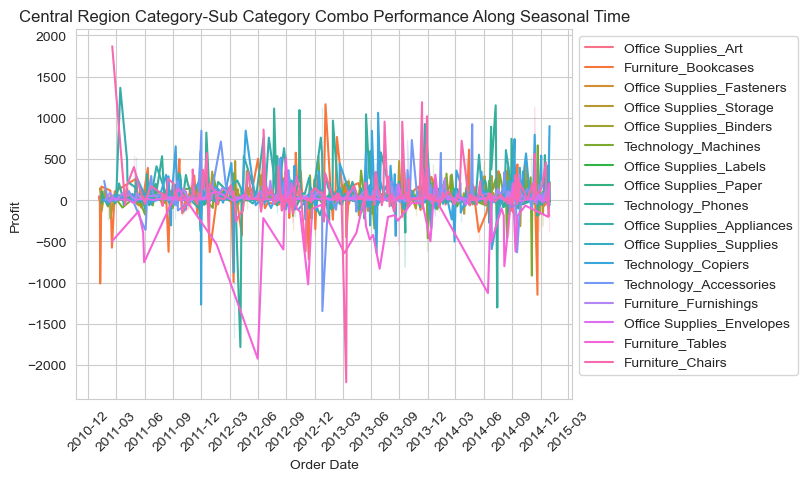

In [221]:
df_central = df[df['Region']=='Central']
df_central['Category_SubCategory'] = df_central['Category'] + '_' + df_central['Sub-Category']

sns.lineplot(x=df_central['Order Date'], y=df_central['Profit'], hue = df_central['Category_SubCategory'])

axis = plt.gca()
axis.xaxis.set_major_locator(MonthLocator(interval = 3))

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Central Region Category-Sub Category Combo Performance Along Seasonal Time')

/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_89802/3797011793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south['Category_SubCategory'] = df_south['Category'] + '_' + df_south['Sub-Category']


Text(0.5, 1.0, 'South Region Category-Sub Category Combo Performance Along Seasonal Time')

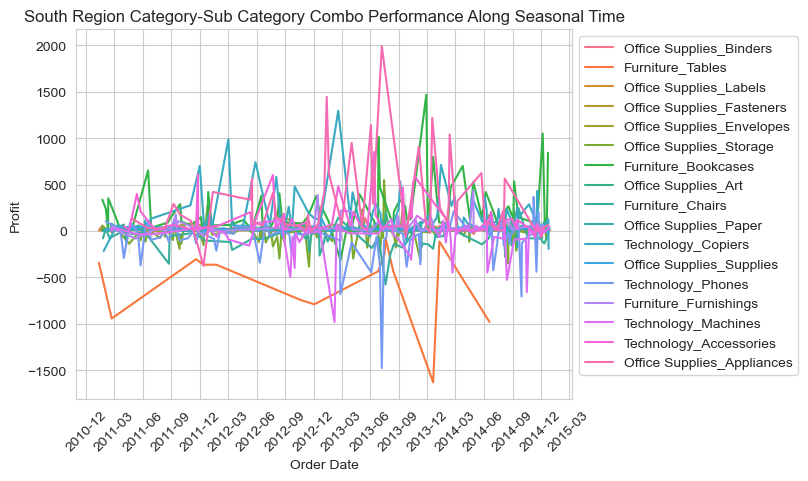

In [222]:
df_south = df[df['Region']=='South']
df_south['Category_SubCategory'] = df_south['Category'] + '_' + df_south['Sub-Category']

sns.lineplot(x=df_south['Order Date'], y=df_south['Profit'], hue = df_south['Category_SubCategory'])

axis = plt.gca()
axis.xaxis.set_major_locator(MonthLocator(interval = 3))

plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('South Region Category-Sub Category Combo Performance Along Seasonal Time')

# we could see that all the category + sub_category combos are showing cyclical performance against seasonal times across three regions. There are fluctuation but over time the profits converge to average as time goes by and no significant increase or decrease along time are observed 

What are the factors that is affecting the sales, how could we inform executives what to improve and what to be careful of

I am using the random forest regressor from H20 packages to see the variable importance, in which it indicates which variable is most related to the target sales

In [223]:
import h2o
from h2o import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init()
h2o.remove_all

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 day 7 hours 25 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_sunnypzz_y68c4j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.372 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


<function h2o.h2o.remove_all(retained=None)>

In [224]:
hdf = H2OFrame(df)
for var in ['Order ID', 'Customer Name', 'Country', 'State', 'City', 'Region',
           'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name']:
    hdf[var] = hdf[var].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [225]:
model = H2ORandomForestEstimator()
features = ['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Profit', 'Quantity', 'Order Year']
target = 'Sales'
model.train(features, target, hdf)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1694543316600_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          1.05215e+07            20           20           20            3791          4689          4211.66

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 120081.28841716975
RMSE: 346.52747137444925
MAE: 143.15484933133925
RMSLE: NaN
Mean Residual Deviance: 120081.28841716975

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-09-13 21:53:59  0.010 sec   0                  nan              nan             nan
    2023-09-13 21:54:00  0.518 sec   1                  371.639          172.763         138116
    2023-09-13 21:54:00  0.977 sec   2                  391.839          180.569         153538
    2023-09-13 21:54:01  1.574 sec   3                  375.961          175.248         141347
    2023-09-13 21:54:01  1.752 sec   4                  397.963          182.734         158374
    2023-09-13 21:54:01  1.897 sec   5                  388.456          177.709         150898
    2023-09-13 21:54:01  2.082 sec   6                  383.326          173.335         146939
    2023-09-13 21:54:02  2.227 sec   7                  388.671          172.179         151066
    2023-09-13 21:54:02  2.600 sec   8                  381.406          167.44          145470
    2023-09-13 21:54:02  3.049 sec   9                  376.952          164.345         142093
    2023-09-13 21:54:03  3.369 sec   10                 376.972          163.157         142108
    2023-09-13 21:54:03  3.525 sec   11                 373.657          161.593         139620
    2023-09-13 21:54:03  3.694 sec   12                 370.175          160.175         137029
    2023-09-13 21:54:03  3.842 sec   13                 369.009          159.004         136168
    2023-09-13 21:54:07  7.926 sec   33                 350.425          145.881         122798
    2023-09-13 21:54:11  11.306 sec  50                 346.527          143.155         120081

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
Profit         1.84073e+10            1                    0.269601
Customer Name  1.45587e+10            0.790916             0.213232
Sub-Category   1.20069e+10            0.652289             0.175858
City           1.05694e+10            0.574195             0.154803
Quantity       4.05001e+09            0.220021             0.0593179
Category       3.964e+09              0.215349             0.0580583
State          2.13377e+09            0.11592              0.031252
Product Name   1.00999e+09            0.0548689            0.0147927
Order ID       3.62317e+08            0.0196833            0.00530663
Country        2.79254e+08            0.0151708            0.00409007
Discount       2.67623e+08            0.0145389            0.00391971
Order Date     2.2065e+08             0.0119871            0.00323173
Ship Mode      1.55579e+08            0.00845203           0.00227867
Order Year     1.35908e+08            0.00738333           0.00199055
Segment        9.94693e+07            0.00540378           0.00145687
Region         5.53629e+07            0.00300765           0.000810866

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Text(0.5, 1.0, 'Variable Importance as Percentage')

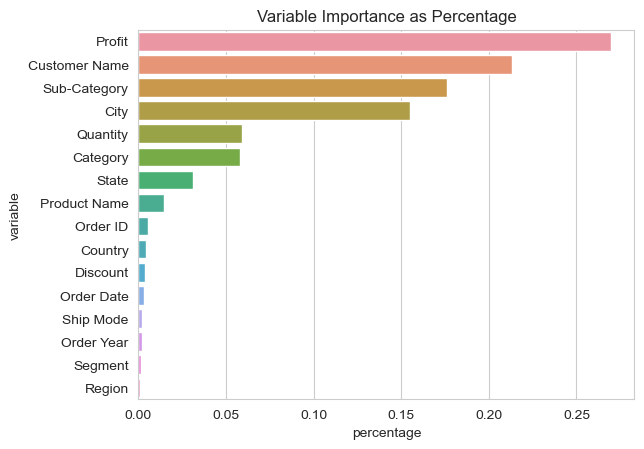

In [226]:
varimp = model.varimp(use_pandas=True)
sns.barplot(y=varimp['variable'], x=varimp['percentage'])
plt.title('Variable Importance as Percentage')

From the variable importance graph we could see that profits affect the sales the most but this should not be considered since profits and sales has some linear relationship between them. The second and third most effective variable is customer name and sub-category, which is an interesting observation

# Determine Origin Year of Customer

In [237]:
# fill the missing value with a randomly generated number ranged from 2011 to 2014
import random
df['Origin'].isna().sum()
df['Origin'] = df['Origin'].fillna(random.randint(2011,2014))

In [238]:
df.head(2)

,Order ID,Order Date_x,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Order Year,Order Date_y,Origin,time elapsed in month
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45.0,-26.0,3.0,2011.0,2011-01-01,2011,0.0
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7.0,2011.0,2011-01-03,2011,0.0


# Calculate cumulative transaction amounts 

In [239]:
# Creating a new column 'Time Elapsed in Month' for later calculation
df['Origin'] = df['Origin'].astype(int)

df['time elapsed in month'] = ((df['Order Date_x'] - pd.to_datetime(df['Origin'].astype(str)+'-01-01')).dt.days/30).round()
df['time elapsed in month']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
8042    36.0
8043    49.0
8044    49.0
8045    49.0
8046    36.0
Name: time elapsed in month, Length: 8047, dtype: float64

In [244]:
pre_table_v = []
for origin in df['Origin'].unique():
    start = int(origin)
    end = df['Origin'].max()
    max_elapse = int((end+1 - start)*12)
    
    for month in range(12, max_elapse+1, 12):
        cumu = df[(df['Origin']==origin) & (df['time elapsed in month']<=month)]['Sales'].sum()
        pre_table_v.append({
            'origin':origin,
            'time elapsed in month': month,
            'cumulative sales': cumu  
        })

In [245]:
pre_table_v = pd.DataFrame(pre_table_v)
pre_table_v.pivot(index='origin', columns='time elapsed in month', values='cumulative sales')

time elapsed in month,12,24,36,48
origin,,,,
2011,422507.542946,762705.542946,1.130675e+06,1.599892e+06
2012,217155.000000,382725.000000,5.778100e+05,NaN
2013,86420.542946,149293.542946,NaN,NaN
2014,12108.000000,NaN,NaN,NaN


# calculate the number of new cutomers 

In [248]:
pre_table_c = []
for origin in df['Origin'].unique():
    start = origin
    end = df['Origin'].max()
    max_elapse = int((end - start + 1)*12)
    
    for month in range(12, max_elapse+1, 12):
        cumu = df[(df['Origin']==origin) & (df['time elapsed in month']<=month)]['Customer Name'].nunique()
        pre_table_c.append({
            'origin':origin,
            'time elapsed in month':month,
            'new user': cumu
        })
pre_table_c = pd.DataFrame(pre_table_c)
pre_table_c.pivot(index='origin', columns='time elapsed in month', values='new user')


time elapsed in month,12,24,36,48
origin,,,,
2011,492.0,492.0,492.0,492.0
2012,204.0,204.0,204.0,NaN
2013,79.0,79.0,NaN,NaN
2014,17.0,NaN,NaN,NaN


# Historic CLV 

In [249]:
pre = pre_table_c.merge(pre_table_v, on=['origin','time elapsed in month'])
pre['CLV'] = pre['cumulative sales']/pre['new user']
pre.pivot(index='origin', columns='time elapsed in month', values='CLV').reset_index()

time elapsed in month,origin,12,24,36,48
0,2011,858.755169,1550.214518,2298.118990,3251.812079
1,2012,1064.485294,1876.102941,2832.401961,NaN
2,2013,1093.930923,1889.791683,NaN,NaN
3,2014,712.235294,NaN,NaN,NaN


Text(0, 0.5, 'Historic CLV')

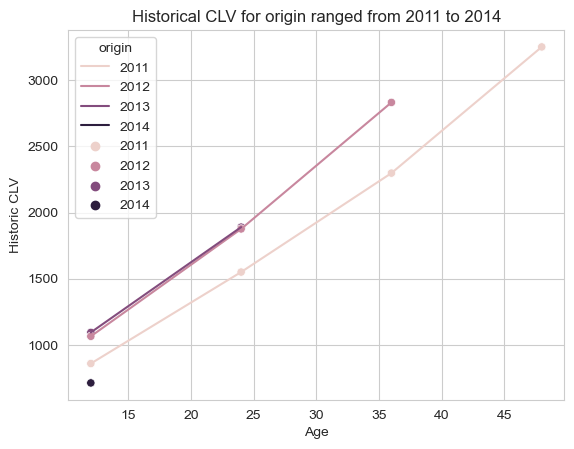

In [251]:
sns.lineplot(x=pre['time elapsed in month'], y=pre['CLV'], hue=pre['origin'])
sns.scatterplot(x=pre['time elapsed in month'], y=pre['CLV'], hue=pre['origin'])
plt.title('Historical CLV for origin ranged from 2011 to 2014')
plt.xlabel('Age')
plt.ylabel('Historic CLV')

In [272]:
pre.groupby('time elapsed in month')['CLV'].sum()

historic_clv = pd.DataFrame(pre.groupby('time elapsed in month')['CLV'].sum()).reset_index()
historic_clv = historic_clv.rename(columns={'time elapsed in month':'age', 'CLV':'HistoricCLV'})
historic_clv


,age,HistoricCLV
0,12,3729.406680
1,24,5316.109142
2,36,5130.520951
3,48,3251.812079


# Interpreting results

In [287]:
spent = pre[(pre['origin']==2011) & (pre['time elapsed in month']==48)]['CLV'].values[0]
print('customers acquired in 2011 spend to date is: ', spent)

customers acquired in 2011 spend to date is:  3251.8120791583924


Text(0, 0.5, 'Average CLV')

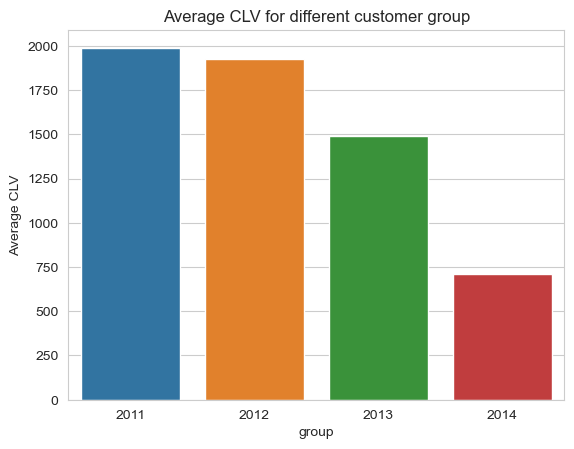

In [284]:
pattern = pd.DataFrame(pre.groupby('origin')['CLV'].mean()).reset_index()
sns.barplot(x=pattern['origin'], y=pattern['CLV'])
plt.title('Average CLV for different customer group')
plt.xlabel('group')
plt.ylabel('Average CLV')

# we could see that customer that are acquired sooner exhibit higher average CLV representing higher spending, which informs the business that the retention is the key. As company is keeping its customer, old customer will spend more than new customers 